In [8]:
import os
import re
import random
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/leader/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
dataframe = pd.read_csv("/Users/leader/Downloads/NLP/corona_tweets.csv")
dataframe.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Labels in the dataset: ['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral']
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64


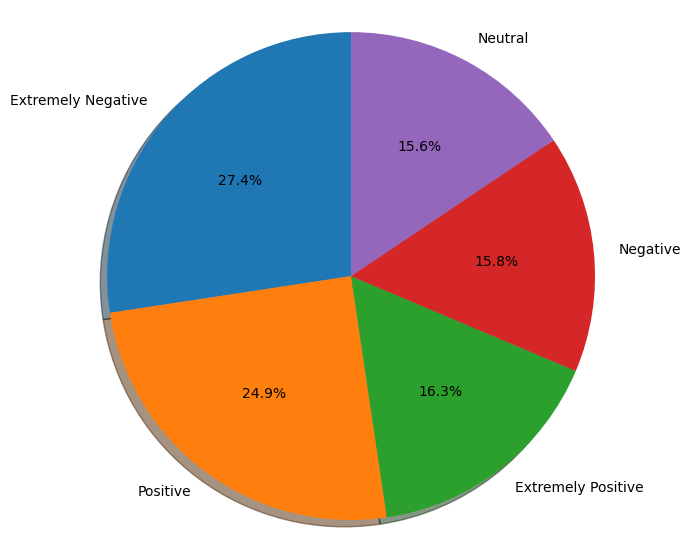

In [39]:
def pie_charts(dataframe):
    label_types = dataframe.Sentiment.unique().astype(str)
    label_counts = dataframe.Sentiment.value_counts()
    print("Labels in the dataset:",label_types)
    print(label_counts)
    labels = label_types
    sizes = [count for count in label_counts]
    fig = plt.figure(figsize = (7,7))
    plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow = True, startangle=90)
    plt.axis('equal')
    plt.show()
pie_charts(dataframe)

In [29]:
label_types = dataframe.Sentiment.unique().astype(str)
label_counts = dataframe.Sentiment.value_counts()
print(label_types,label_counts)

['Extremely Negative' 'Positive' 'Extremely Positive' 'Negative' 'Neutral'] Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64


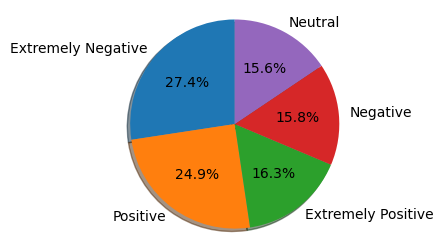

In [46]:
labels = label_types
sizes = [count for count in label_counts]
fig = plt.figure(figsize = (3,3))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow = True, startangle=90)
plt.axis('equal')
plt.show()

In [45]:
dataframe[dataframe['Sentiment']== 'Negative']['OriginalTweet'].shape

(1041,)

In [91]:
#performing a binary classification
all_positive_tweets = list(dataframe[dataframe.Sentiment == 'Positive']['OriginalTweet'].astype(str))
all_negative_tweets = list(dataframe[dataframe.Sentiment == 'Negative']['OriginalTweet'].astype(str))[:947]
positive_train, positive_test = train_test_split(all_positive_tweets, test_size = 0.2, random_state = 13)
negative_train, negative_test = train_test_split(all_negative_tweets, test_size = 0.2, random_state = 13)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"The size of training dataset is: {len(positive_train)+ len(negative_train)}")
print("The size of test dataset is:", len(positive_test)+ len(negative_test))
#print positive in green and negative in red
print('\033[92m' + all_positive_tweets[random.randint(0,947)])
print('\033[91m' + all_negative_tweets[random.randint(0,947)])

The size of training dataset is: 1514
The size of test dataset is: 380

#Covid_19


Your prayers are useless, only science will come to the rescue. If this does happen, our world will not recover for years. Stock up your can food people. #doomsdayBunker


In [123]:
#Tokenisation starts
token = all_positive_tweets[12]
token1 = token.split()
print(token1)

['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus.', 'https://t.co/5mYfz3RAD0', '#retail', '#ecommerce', '#study', '#coronavirus', 'https://t.co/Dz3H6zrWUT']


In [112]:
tokens = re.findall("[\w']+", token)
print('Using regexes:', tokens)

Using regexes: ['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', 'https', 't', 'co', '5mYfz3RAD0', 'retail', 'ecommerce', 'study', 'coronavirus', 'https', 't', 'co', 'Dz3H6zrWUT']


In [121]:
from nltk.tokenize import word_tokenize
w = word_tokenize(token)
print("Using NLTK:", w)

Using NLTK: ['Consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus']


In [141]:
#token = all_positive_tweets[12].split('. ')
#alternate method
token1 = re.compile('[.!?] ').split(token)
token1
#using NLTK
from nltk.tokenize import sent_tokenize
sentence_splits = sent_tokenize(token)

In [143]:
from nltk.corpus import stopwords
from nltk.corpus import twitter_samples
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# remove hastags and https
pattern = r"https?://[^\s\n\r]+"
pattern2 = r"#"
token2 = re.sub(pattern," ", token)
token3 = re.sub(pattern2, " ", token2)
print(token3)

Consumers have increased their online shopping due to coronavirus.    retail  ecommerce  study  coronavirus  


In [165]:
#intiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
tweet_tokens = tokenizer.tokenize(token3)
print(tweet_tokens)

['consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'retail', 'ecommerce', 'study', 'coronavirus']


In [167]:
nltk.download("stopwords")
sw = stopwords.words("english")
#remove stopwords
#token4 = [i for i in tweet_tokens if not in stopwords]
print(sw)
print("\n", string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leader/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [171]:
#cleaning the tweets
tweet_clean = []
for word in tweet_tokens:
    if (word not in sw and word not in string.punctuation):
         # remove stopwords
         # remove punctuation
        tweet_clean.append(word)
print(tweet_clean)

['consumers', 'increased', 'online', 'shopping', 'due', 'coronavirus', 'retail', 'ecommerce', 'study', 'coronavirus']


In [173]:
#Stemming & Lemmatization try out
#have, having, had --> have

stemmer = PorterStemmer()
tweet_stem = []

for word in tweet_clean:
    stemmed_word = stemmer.stem(word)
    tweet_stem.append(stemmed_word)
print(tweet_stem)
"""Stemming is a rule based technique and is applied step by step on words without any additional context, it is much faster as compared to lemmatization which needs the entire text or POS tag to generate the root lemma correctly.
If you need speed then stemming can be prefered else lemmatization is better in most cases."""

['consum', 'increas', 'onlin', 'shop', 'due', 'coronaviru', 'retail', 'ecommerc', 'studi', 'coronaviru']


In [ ]:
"""We can think of human language as composed of four major building blocks:
Phonemes - Phonemes are the smallest units of sound in a language. They may not have any meaning by themselves but can induce meanings when uttered in combination with other phonemes.
Morphemes and Lexemes - A morpheme is the smallest unit of language that has a meaning. It is formed by a combination of phonemes. Not all morphemes are words, but all prefixes and suffixes are morphemes. Lexemes are the structural variations of morphemes related to one another by meaning.,
Syntax - Syntax is a set of rules to construct grammatically correct sentences out of words and phrases in a language.
Context - Context is how various parts in a language come together to convey a particular meaning. Context includes long-term references, world knowledge, and common sense along with the literal meaning of words and phrases."""

In [213]:
def clean_tweet(tweet):
    stemmer = PorterStemmer()
    tweet_clean = []
    tweet_stem = []
    sw = stopwords.words("english")
    
    pattern1 = r"https?://[^\s\n\r]+"
    pattern2 = r"#"
    pattern3 = r'\$\w*'
    pattern4 = r'^RT[\s]+'
    tweet = re.sub(pattern1," ", tweet)
    tweet = re.sub(pattern2, " ", tweet)
    tweet = re.sub(pattern3," ", tweet)
    tweet = re.sub(pattern4, '', tweet)
    
     # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    for word in tweet_tokens:
        if (word not in sw and word not in string.punctuation):
             # remove stopwords
             # remove punctuation
            stemmed_word = stemmer.stem(word)
            tweet_clean.append(stemmed_word)
    
    return tweet_clean

In [185]:
tweet = all_positive_tweets[12]
#Change to green colour
print('\033[92m')
tweets_stem = clean_tweet(tweet)
#Change to default colour
print('\033[94m')
print(tweets_stem, end="")


['consumers', 'have', 'increased', 'their', 'online', 'shopping', 'due', 'to', 'coronavirus', '.', 'retail', 'ecommerce', 'study', 'coronavirus']

['consum', 'increas', 'onlin', 'shop', 'due', 'coronaviru', 'retail', 'ecommerc', 'studi', 'coronaviru']

In [ ]:
"""How to represent text in NLP
Sparse representation (Representing a text as a vector)
Picture a list of tweets. Then your vocabulary, V, would be the list of unique words from your list of tweets.
To get that list, you will have to go through all the words from the tweets and save every new word that appears in the search."""

In [214]:
#lets have a vector V having three parameters - [Bias (=1), sum of frequencies of that word in positive sentiment, sum of frequencies of that word in negative sentiment ]
def build_freqs(tweets,ys):
    """
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
        freqs: a dictionary mapping each (word, sentiment) pair (=key) to its frequency (=value)
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    
    yslist = np.squeeze(ys).tolist()
    
    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    
    freqs = {}
    for y, tweet in zip(yslist,tweets):
        for word in clean_tweet(tweet):
            pair = (word,y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair]=1
    return freqs
    

In [215]:
training_tweets = positive_train + negative_train
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(positive_train))),np.zeros((len(negative_train))))
print(labels)

[1. 1. 1. ... 0. 0. 0.]


In [219]:
# create frequency dictionary
freqs = build_freqs(training_tweets,labels)
print(freqs)

{('supermarket', 1.0): 127, ('unusu', 1.0): 1, ('busi', 1.0): 44, ('last', 1.0): 17, ('night', 1.0): 7, ('...', 1.0): 75, ('manag', 1.0): 7, ('said', 1.0): 13, ('peopl', 1.0): 149, ('take', 1.0): 38, ('advantag', 1.0): 9, ('space', 1.0): 2, ('probabl', 1.0): 7, ('precautionari', 1.0): 1, ('measur', 1.0): 8, ('covid', 1.0): 558, ('_19', 1.0): 284, ('new', 1.0): 23, ('hit', 1.0): 8, ('retail', 1.0): 74, ('industri', 1.0): 6, ('hard', 1.0): 12, ('work', 1.0): 67, ('phone', 1.0): 9, ('weekend', 1.0): 5, ('talk', 1.0): 7, ('multipl', 1.0): 3, ('small', 1.0): 10, ('medium', 1.0): 1, ('verdict', 1.0): 1, ('store', 1.0): 249, ('closur', 1.0): 2, ('u', 1.0): 12, ('could', 1.0): 15, ('explod', 1.0): 2, ('bankruptci', 1.0): 2, ('local', 1.0): 61, ('exampl', 1.0): 4, ('2', 1.0): 32, ('area', 1.0): 10, ('shop', 1.0): 153, ('includ', 1.0): 12, ('babi', 1.0): 8, ('isl', 1.0): 1, ('pain', 1.0): 1, ('relief', 1.0): 3, ('dri', 1.0): 3, ('food', 1.0): 260, ('tin', 1.0): 3, ('also', 1.0): 23, ('frozen', 1

In [222]:
# check data type
print(f'type of data: {type(freqs)}')
# check length of the dictionary
print(f'length of dictionary is : {len(freqs)}')

type of data: <class 'dict'>
length of dictionary is : 6846


In [224]:
#Feature extraction starts
# Feature = [Bias (=1), Sum of frequencies of that word in positive sentiment, Sum of frequencies of that word in negative sentiment]

# select some words to appear in the report.
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        ':)', ':(', 'song', 'idea', 'power', 'play']

# list representing our table of word counts.
data=[]

# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]

# loop through our selected words

for word in keys:
    
    # initialize positive and negative counts
    
    pos = neg = 0
    
    # retrieve number of positive counts
    
    if (word,1) in freqs:
        pos = freqs[(word,1)]
    
     # retrieve number of negative counts
        
    if (word,0) in freqs:
        neg = freqs[(word,0)]
        
     # append the word counts to the table
    data.append([word, pos, neg])

data    

[['void', 0, 0],
 ['commun', 16, 12],
 ['spirit', 1, 1],
 ['stop', 12, 28],
 ['merri', 0, 0],
 ['nice', 5, 5],
 ['good', 45, 30],
 ['bad', 1, 10],
 ['sad', 0, 3],
 ['mad', 2, 7],
 ['best', 8, 3],
 ['pretti', 7, 3],
 [':)', 3, 0],
 [':(', 3, 0],
 ['song', 0, 0],
 ['idea', 7, 6],
 ['power', 3, 1],
 ['play', 9, 2]]

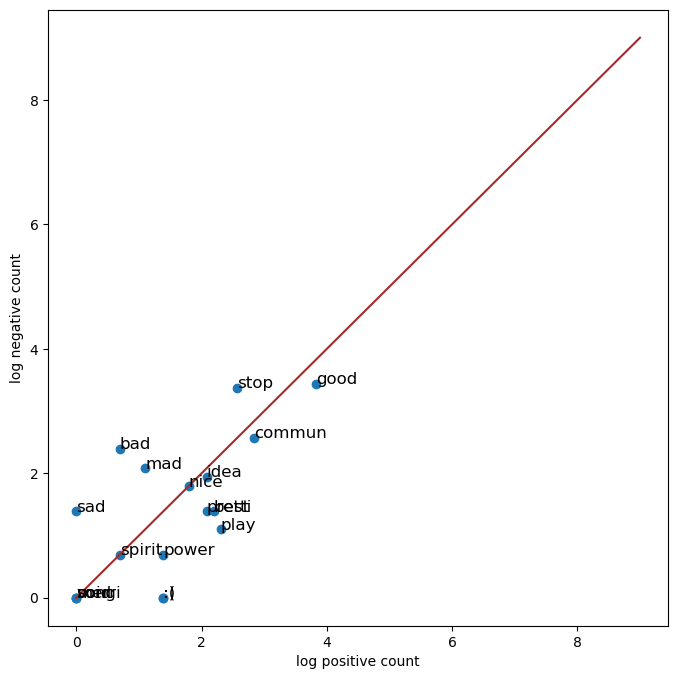

In [253]:
#let's plot a graph

fig, ax = plt.subplots(figsize=(8,8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0) to new list x
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)  

plt.xlabel("log positive count")
plt.ylabel("log negative count")

# Add the word as the label at the same position as you added the points just before
for z in range(0, len(data)):
    ax.annotate(data[z][0], (x[z],y[z]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'brown') # Plot the red line that divides the 2 areas.
plt.show()

In [246]:
x = np.log([x[1]+1 for x in data])
print(x,y)

[0.         2.83321334 0.69314718 2.56494936 0.         1.79175947
 3.8286414  0.69314718 0.         1.09861229 2.19722458 2.07944154
 1.38629436 1.38629436 0.         2.07944154 1.38629436 2.30258509] [0.         2.56494936 0.69314718 3.36729583 0.         1.79175947
 3.4339872  2.39789527 1.38629436 2.07944154 1.38629436 1.38629436
 0.         0.         0.         1.94591015 0.69314718 1.09861229]


In [271]:
def extract_features(tweet, freqs):
    """
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        x: a feature vector of dimension (1,3)
    """
#process_tweet tokenizes, stems, and removes stopwords
    word_l = clean_tweet(tweet)
# 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1,3))
#bias term is set to 1
    x[0,0] = 1
    for word in word_l:
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        #Alt Code -> x[0,1] += freqs((word,1.0))
   
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
    
    assert(x.shape == (1,3))
    return x

In [263]:
x = np.zeros((1,3))
x[0][0] = 1
print(x,x.shape)

[[1. 0. 0.]] (1, 3)


In [275]:
train_x = training_tweets
temp1 = extract_features(train_x[0], freqs)
print(temp1)

[[1.000e+00 1.347e+03 1.501e+03]]


In [280]:
temp2 = extract_features("bad mad stop sad", freqs)
print(temp2)

[[ 1. 15. 48.]]


In [302]:
#preparing training data
# collect the features 'x' and stack them into a matrix 'X'

X = np.zeros((len(train_x),3))

for i in range(len((train_x))):
    X[i,:] = extract_features(train_x[i], freqs)
    
# training labels corresponding to X
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
Y = np.ravel(train_y,order='C') #flattening of 2D array in 1D
print(train_y)

[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [289]:
# USING MOST BASIC MODEL TO CLASSIFY 

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X,Y)

#print training accuracy
print("Training Accuracy:" , clf.score(X,Y))

Training Accuracy: 0.6875825627476883


In [291]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X,Y)
clf.score(X,Y)

0.6875825627476883

In [298]:
#testing

testing_times = positive_test + negative_test

X1 = np.zeros((len(testing_times),3))

for i in range(len((testing_times))):
    X1[i,:] = extract_features(testing_times[i], freqs)
    
# labels corresponding to X
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
Y1 = np.ravel(test_y,order='C')

print(f'The test accuracy is : {clf.score(X1,Y1)}')

The test accuracy is : 0.5789473684210527


In [294]:
X1 = np.zeros((len(testing_times),3))
print(X1)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [325]:
#Predict whether a tweet is positive or negative.

def predict_custom_tweet(tweet, freqs):
    x = extract_features(tweet, freqs)
    y_pred = clf.predict(x)
    return y_pred
    
#test your prediction

list_of_tweets = ['\033[92m'+'Thank God coronovirus is over', 
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding', 
                  '\033[92m'+'Government efforts are great.', 
                  '\033[93m'+'Nonsense', #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus', 
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']

for tweet in list_of_tweets:
    print('%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 0.000000
This is seriously ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 1.000000
Nonsense -> 0.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000


In [326]:
def predict_custom_tweet(tweet, freqs):
    x = extract_features(tweet,freqs)
    y_pred = clf.predict(x)
    return y_pred

# test your function
list_of_tweets = ['\033[92m'+'Thank God coronovirus is over', 
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding', 
                  '\033[92m'+'Government efforts are great.', 
                  '\033[93m'+'Nonsense', #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus', 
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']

for tweet in list_of_tweets:
    print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 0.000000
This is seriously ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 1.000000
Nonsense -> 0.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000
